In [1]:
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
if __name__ == '__main__':
    dt_heart = pd.read_csv('./data/heart.csv')

    dt_features = dt_heart.drop(['target'], axis = 1)
    dt_target = dt_heart['target']

    #Splitting our data
    X_train, X_test, y_train, y_test = train_test_split(dt_features,
                                                        dt_target,
                                                        test_size=0.3,
                                                        random_state=42)


In [24]:
#Scaling our data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [25]:
#Convencional PCA
pca = PCA(n_components=3)
pca.fit(X_train_scaled)

PCA(n_components=3)

In [26]:
#Incremental PCA
ipca = IncrementalPCA(n_components=3, batch_size=10)
ipca.fit(X_train_scaled)

IncrementalPCA(batch_size=10, n_components=3)

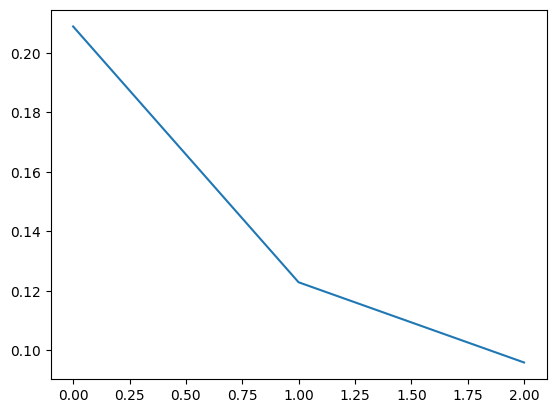

In [31]:
#Let's plot a graph which tells us how much of the variance explain each component
plt.plot(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)

In [32]:
#Apply pca to train and test datasets
dt_train = pca.transform(X_train_scaled)
dt_test = pca.transform(X_test_scaled)

In [36]:
#lets model, logistic score is the function to evaluate the accuracy of predictions
logistic = LogisticRegression(solver='lbfgs')
logistic.fit(dt_train, y_train)
print('score pca:', logistic.score(dt_test, y_test))

score pca: 0.7792207792207793


### **Comparing results with SINGULAR VALUE DECOMPOSITION**

In [34]:
X = pd.DataFrame({"variable_1":[10, 11, 8, 3, 2, 1], "variable_2":[6, 4, 5, 3, 2.8, 1]})

In [35]:
#Convencional PCA
pca = PCA(n_components=1)
pca.fit(X)

PCA(n_components=1)

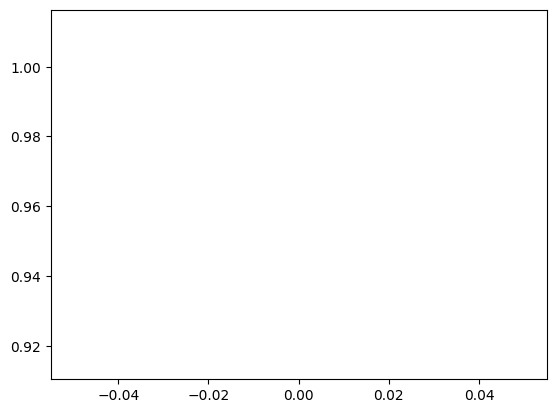

In [36]:
#Let's plot a graph which tells us how much of the variance explain each component
plt.plot(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)

In [37]:
pca.explained_variance_ratio_

array([0.96336809])

In [38]:
X

,variable_1,variable_2
0,10,6.0
1,11,4.0
2,8,5.0
3,3,3.0
4,2,2.8
5,1,1.0


In [39]:
df_transformado = pca.transform(X)
df_transformado

array([[-4.71999755],
       [-4.98886062],
       [-2.50015236],
       [ 2.8812487 ],
       [ 3.89024415],
       [ 5.43751769]])